In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [4]:
dataset = pd.read_excel('/content/drive/MyDrive/소회의실 프로젝트/Dataset.xlsx')
dataset['주문일자'] = pd.to_datetime(dataset['주문일자'],format='%Y%m%d')
file = dataset.copy()

In [5]:
dataset.head()

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부
0,A0001,2020-01-28,1,30,경기,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N
1,A0001,2020-01-30,1,30,경기,3,00000A045060,오공,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,N,N
2,A0001,2020-03-13,1,30,경기,1,00000A253840,수젠텍,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,N,N
3,A00010,2020-02-20,1,20,경남,3,00000A009190,대양금속보통주,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,N,N
4,A000100,2020-02-11,2,40,서울,1,00000A001740,SK네트웍스보통주,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,N,N


In [27]:
#재무정보 
jaemu = pd.read_csv('/content/drive/MyDrive/소회의실 프로젝트/외부데이터/재무정보.csv')
#시가, 고가, 저가, 종가, 거래량
ohlcv =pd.read_csv('/content/drive/MyDrive/소회의실 프로젝트/외부데이터/ohlcv_ATR.csv')


## 기본정보

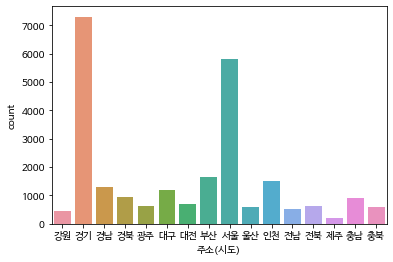

In [7]:
#주소
address = file.groupby('주소(시도)')['고객구분코드'].nunique()
address= pd.DataFrame(address).rename(columns = {'고객구분코드':'count'}).reset_index()
address
sns.barplot(data=address, x= '주소(시도)',y = 'count')
plt.rc('font', family='NanumBarunGothic') 


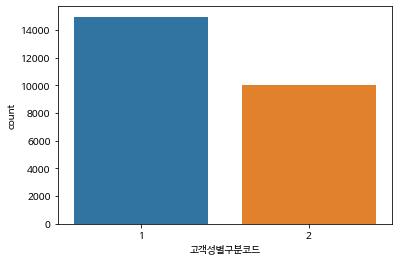

In [8]:
#성별
gender = file.groupby('고객성별구분코드')['고객구분코드'].nunique()
gender= pd.DataFrame(gender).rename(columns = {'고객구분코드':'count'}).reset_index()
sns.barplot(data=gender, x= '고객성별구분코드',y = 'count')

 


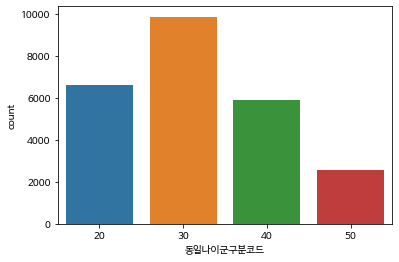

In [9]:
#나이
age = file.groupby('동일나이군구분코드')['고객구분코드'].nunique()
age= pd.DataFrame(age).rename(columns = {'고객구분코드':'count'}).reset_index()
sns.barplot(data=age, x= '동일나이군구분코드',y = 'count')
 

## 주문일자

Text(0.5, 0, 'order date')

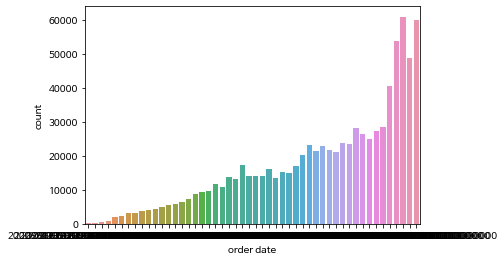

In [10]:
#주문일자
order_date = file.groupby('주문일자')['주문일자'].count()
order_date= pd.DataFrame(order_date).rename(columns = {'주문일자':'count'}).reset_index()

# plt.figure(figsize= (20,10))
sns.barplot(data=order_date, x= '주문일자',y = 'count')
# plt.xticks(ticks = np.arange(0,100, 2), labels = xticks)
plt.xlabel('order date')

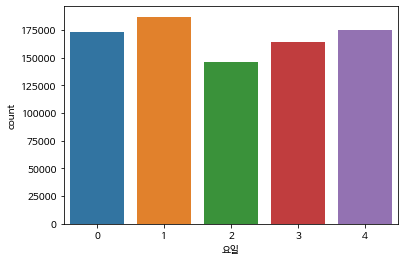

In [11]:
# 요일
file['요일'] = file['주문일자'].dt.weekday
weekday = pd.DataFrame(file.groupby('요일')['고객구분코드'].count()).rename(columns={'고객구분코드':'count'}).reset_index()
sns.barplot(data=weekday, x= '요일', y='count')

Text(0.5, 0.98, '성별 주문요일')

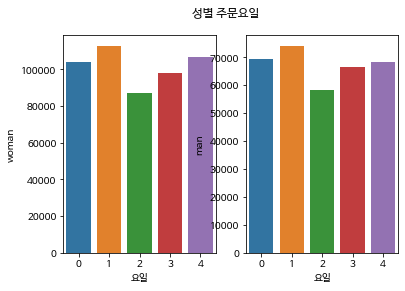

In [12]:
## 성별 주문요일
weekday_w = file.loc[file['고객성별구분코드']==1].groupby('요일')['고객성별구분코드'].count()
weekday_m = file.loc[file['고객성별구분코드']==2].groupby('요일')['고객성별구분코드'].count()

weekday_wm =pd.DataFrame({'woman':weekday_w,'man':weekday_m})

plt.subplot(1,2,1)
sns.barplot(data=weekday_wm, x= weekday_wm.index,y = 'woman')
plt.subplot(1,2,2)
sns.barplot(data=weekday_wm,  x= weekday_wm.index,y = 'man')

plt.suptitle('성별 주문요일')


### 나이별 주문요일

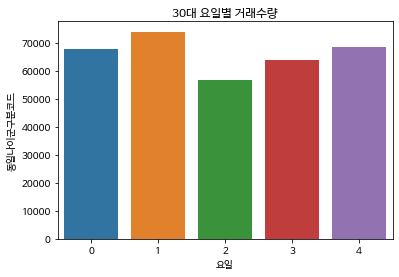

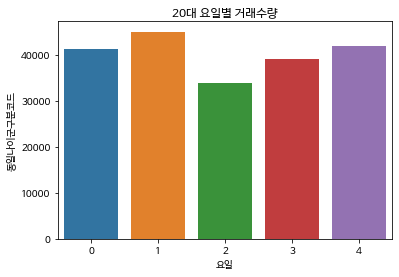

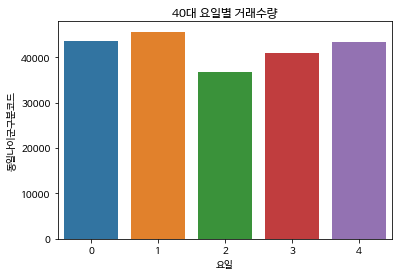

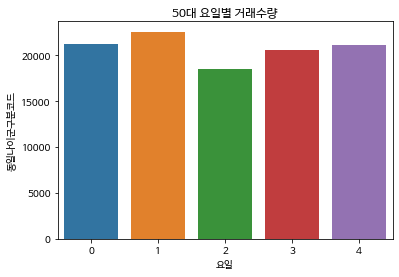

In [13]:
## 나이별 주문요일
for age in file['동일나이군구분코드'].unique():
  weekday_age =pd.DataFrame( file.loc[file['동일나이군구분코드']==age].groupby('요일')['동일나이군구분코드'].count())
  plt.figure()
  ax = sns.barplot(data=weekday_age, x= weekday_age.index,y = '동일나이군구분코드')
  plt.title(str(age) +'대 요일별 거래수량')




## 첫 거래일

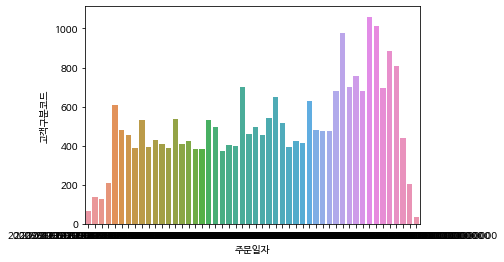

In [131]:
#첫 거래일
first_date = pd.DataFrame(file.groupby('고객구분코드')['주문일자'].min()).reset_index()
first_date = pd.DataFrame(first_date.groupby('주문일자')['고객구분코드'].count())

sns.barplot(data=first_date.reset_index(), x= '주문일자',y = '고객구분코드')
plt.rc('font', family='NanumBarunGothic') 
# plt.show()

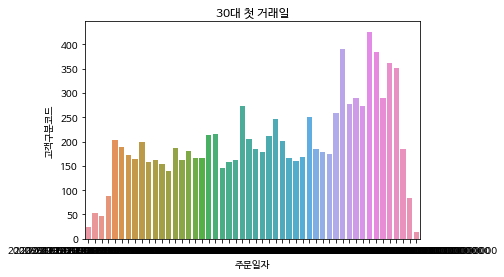

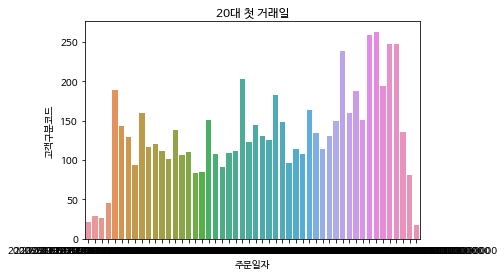

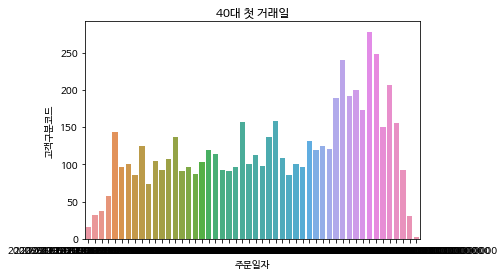

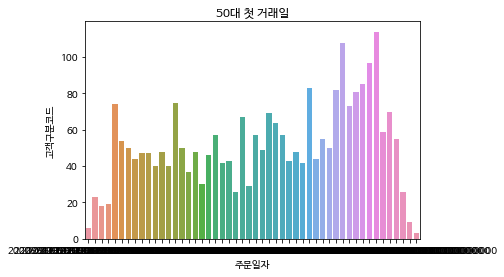

In [127]:
# 나이별 첫 거래일
for age in file['동일나이군구분코드'].unique():
  first_date = pd.DataFrame(file.loc[file['동일나이군구분코드']==age].groupby('고객구분코드')['주문일자'].min()).reset_index()
  first_date = pd.DataFrame(first_date.groupby('주문일자')['고객구분코드'].count())

  plt.figure()
  ax = sns.barplot(data=first_date.reset_index(), x= '주문일자',y = '고객구분코드')
  # ax.xaxis.set_major_locator(md.AutoDateLocator())
  plt.title(str(age)+'대 첫 거래일')
  

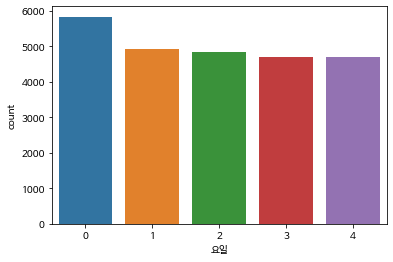

In [129]:
#첫 거래 요일
first_date = pd.DataFrame(file.groupby('고객구분코드')['주문일자'].min()).reset_index()
first_date['요일'] =first_date['주문일자'].dt.weekday
first_weekday = pd.DataFrame(first_date.groupby('요일')['고객구분코드'].count()).rename(columns={'고객구분코드':'count'}).reset_index()
sns.barplot(data=first_weekday, x= '요일', y='count')


## 주문시간대


Text(0.5, 0, 'order time')

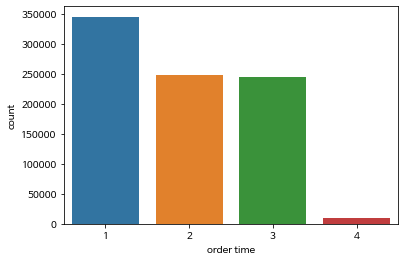

In [130]:
#주문시간대
order_time = file.groupby('주문시간대')['주문시간대'].count()
order_time= pd.DataFrame(order_time).rename(columns = {'주문시간대':'count'}).reset_index()

sns.barplot(data=order_time, x= '주문시간대',y = 'count')
# plt.xticks(ticks = np.arange(0,100, 2), labels = xticks)
plt.xlabel('order time')

### 성별 주문시간대 분포

In [ ]:
# order_time_w = file.loc[file['고객성별구분코드']==1].groupby('주문시간대').agg({'주문시간대':'count','고객성별구분코드':'mean'})
# order_time_m = file.loc[file['고객성별구분코드']==2].groupby('주문시간대').agg({'주문시간대':'count','고객성별구분코드':'mean'})
# order_time_wm = order_time_w.append(order_time_m).rename(columns = {'주문시간대':'count'})
# sns.barplot(data=order_time_wm, x= order_time_wm.index,y = 'count',hue= '고객성별구분코드' )

Text(0.5, 0.98, '성별 주문시간대')

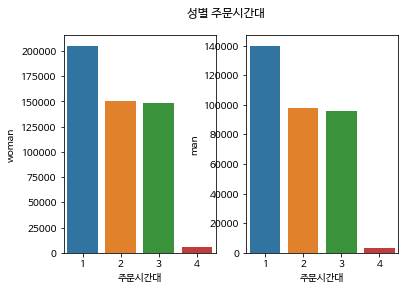

In [18]:
order_time_w = file.loc[file['고객성별구분코드']==1].groupby('주문시간대')['주문시간대'].count()
order_time_m = file.loc[file['고객성별구분코드']==2].groupby('주문시간대')['주문시간대'].count()
order_time_wm = pd.DataFrame({'woman':order_time_w,'man':order_time_m})

plt.subplot(1,2,1)
sns.barplot(data=order_time_wm, x= order_time_wm.index,y = 'woman')
plt.subplot(1,2,2)
sns.barplot(data=order_time_wm,  x= order_time_wm.index,y = 'man')

plt.suptitle('성별 주문시간대')


Text(0.5, 0, '하한가여부')

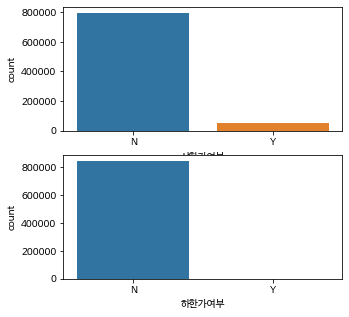

In [19]:
#상한가여부
plt.figure(figsize=(5,5))
plt.subplot(2,1,1)
upper_limit = file.groupby('상한가여부')['상한가여부'].count()
upper_limit= pd.DataFrame(upper_limit).rename(columns = {'상한가여부':'count'}).reset_index()

sns.barplot(data=upper_limit, x= '상한가여부',y = 'count')
plt.xlabel('상한가여부')

#하한가여부
plt.subplot(2,1,2)
low_limit = file.groupby('하한가여부')['하한가여부'].count()
low_limit= pd.DataFrame(low_limit).rename(columns = {'하한가여부':'count'}).reset_index()

sns.barplot(data=low_limit, x= '하한가여부',y = 'count')
plt.xlabel('하한가여부')


## 거래정보

Text(0.5, 0, '거래소구분코드')

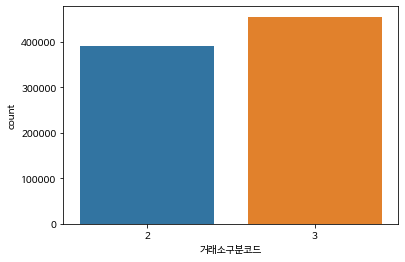

In [24]:
#거래소구분코드
board = file.groupby('거래소구분코드')['거래소구분코드'].count()
board= pd.DataFrame(board).rename(columns = {'거래소구분코드':'count'}).reset_index()
sns.barplot(data=board, x= '거래소구분코드',y = 'count')
plt.xlabel('거래소구분코드')


Text(0.5, 1.0, '총체결수량')

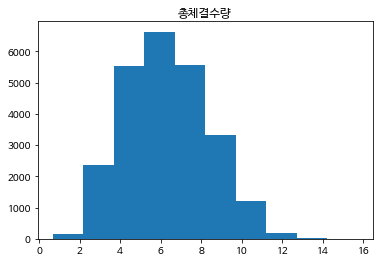

In [25]:
#총체결수량
# from sklearn.preprocessing import RobustScaler
# robuster_scaler = RobustScaler()
amount = file.groupby('고객구분코드')['총체결수량'].sum()
amount= pd.DataFrame(amount).rename(columns = {'총체결수량':'sum'}).reset_index()
amount_log = np.log1p(amount['sum'])
plt.hist(amount_log)
plt.title('총체결수량')

### 거래 상위종목(횟수, 금액, 수량 기준)
-주식별로 거래량이 동학개미운동 때 폭증했는지도 확인

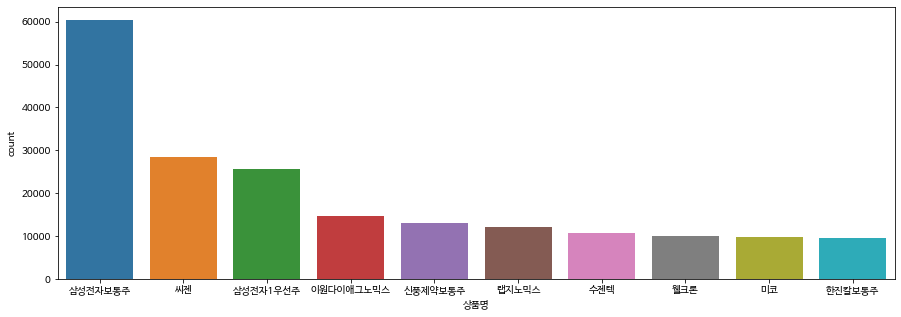

In [20]:
#주식 거래횟수 상위 10
plt.figure(figsize=(15,5))
stock = file.groupby('상품명')['상품명'].count().sort_values(ascending = False)[:10]
stock= pd.DataFrame(stock).rename(columns = {'상품명':'count'}).reset_index()
sns.barplot(data=stock, x= '상품명',y = 'count')
plt.xlabel('상품명')


total = stock.set_index('상품명')

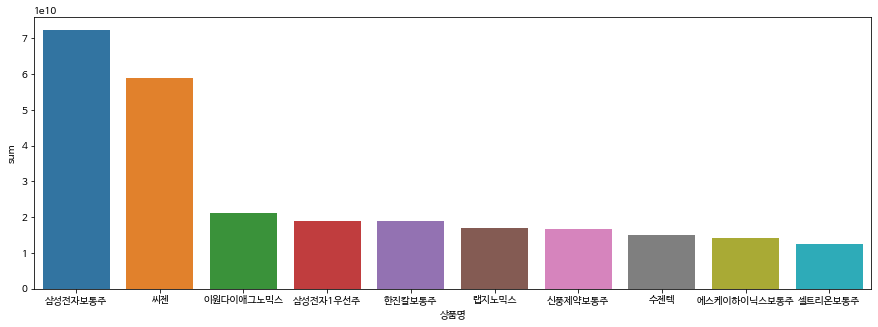

In [21]:
#주식 거래금액 상위 10개
plt.figure(figsize=(15,5))
stock = file.groupby('상품명')['총체결금액'].sum().sort_values(ascending = False)[:10]
stock= pd.DataFrame(stock).rename(columns = {'총체결금액':'sum'}).reset_index()
sns.barplot(data=stock, x= '상품명',y = 'sum')
plt.xlabel('상품명')
total = total.join(stock.set_index('상품명'), how='outer')

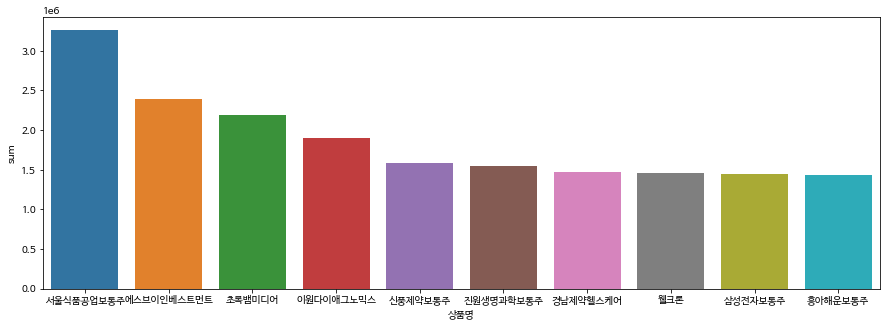

In [22]:
#주식 거래수량합 상위 10개
plt.figure(figsize=(15,5))
stock = file.groupby('상품명')['총체결수량'].sum().sort_values(ascending = False)[:10]
stock= pd.DataFrame(stock).rename(columns = {'총체결수량':'sum'}).reset_index()
sns.barplot(data=stock, x= '상품명',y = 'sum')
plt.xlabel('상품명')

total = total.join(stock.set_index('상품명'),lsuffix= '_',how='outer')
total.columns= ['거래횟수','거래금액','거래수량']

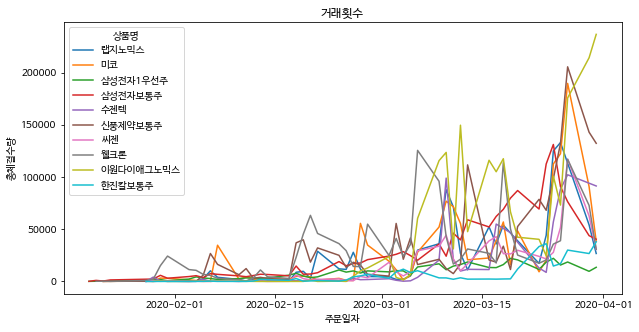

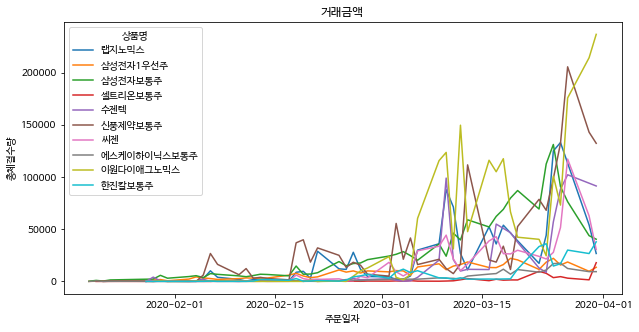

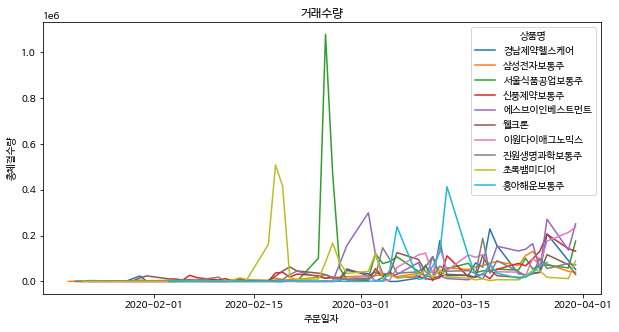

In [23]:
for col in total.columns:
  plt.figure(figsize=(10,5))
  stock10 = file.loc[file['상품명'].isin(total[col].dropna().index),['상품명','주문일자','총체결수량']].sort_values(by=['상품명','주문일자'])
  stock10_df = pd.DataFrame(stock10.groupby(['상품명','주문일자'])['총체결수량'].sum()).reset_index()
  sns.lineplot(data= stock10_df, x= '주문일자',y='총체결수량', hue= '상품명')
  plt.title(col)

Text(0.5, 1.0, '거래수량')

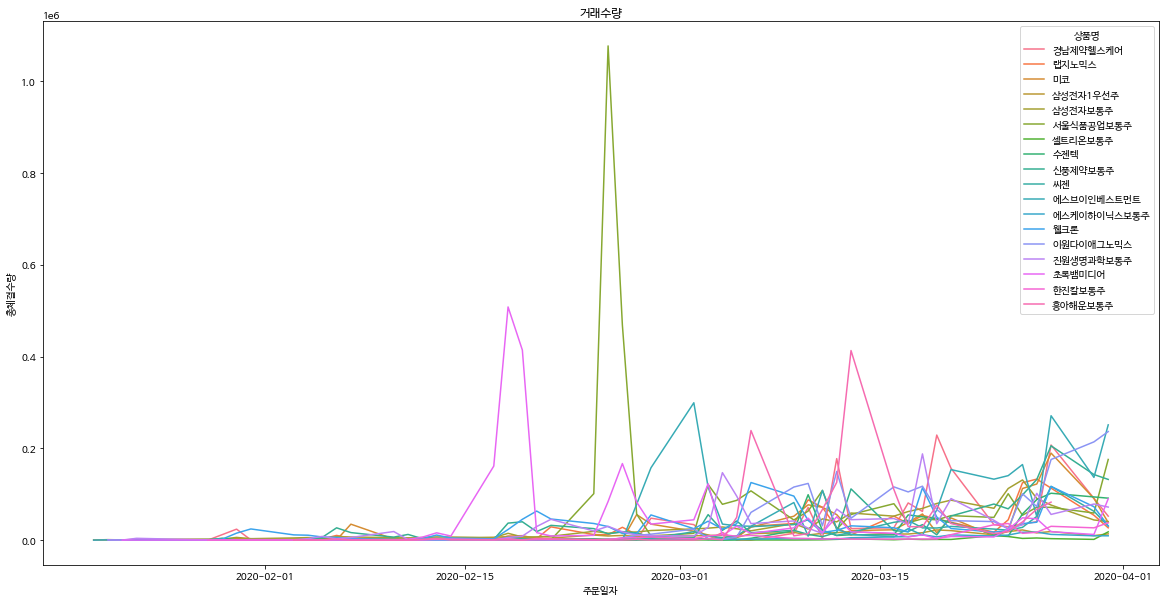

In [39]:
plt.figure(figsize=(20,10))
stock10 = file.loc[file['상품명'].isin(total.index),['상품명','주문일자','총체결수량']].sort_values(by=['상품명','주문일자'])
stock10_df = pd.DataFrame(stock10.groupby(['상품명','주문일자'])['총체결수량'].sum()).reset_index()
sns.lineplot(data= stock10_df, x= '주문일자',y='총체결수량', hue= '상품명')
plt.title(col)

In [82]:
stock10_df.loc[stock10_df['총체결수량']==stock10_df['총체결수량'].max()]

,상품명,주문일자,총체결수량
247,서울식품공업보통주,2020-02-25,1077534


In [99]:
ohlcv['날짜'] =ohlcv['날짜'].apply(pd.to_datetime,format= '%Y-%m-%d')

Text(0.5, 1.0, '종가')

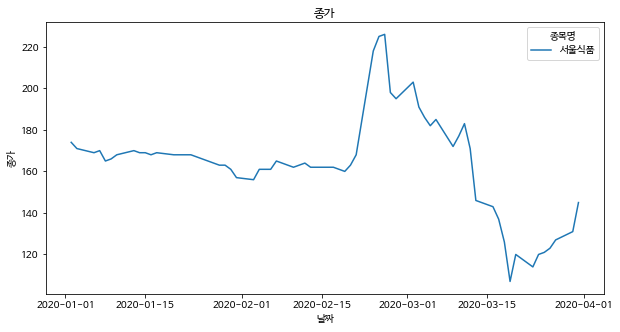

In [116]:
import matplotlib.dates as md
plt.figure(figsize=(10,5))
ax = sns.lineplot(data= ohlcv.loc[ohlcv['종목명']=='서울식품'], x= '날짜',y='종가', hue= '종목명')
ax.xaxis.set_major_locator(md.AutoDateLocator())
plt.title('종가')

# ax2 = plt.twinx()
# sns.lineplot(data= ohlcv.loc[ohlcv['종목명'].str.contains('서울식품우')], x= '날짜',y='거래량', hue= '종목명')


서울식품공업보통주의 급등은 코로나의 영향으로 간편식 중심으로 식료품 판매가 급증한 영향이다.


### 식품관련주
- 서울식품 제외

Text(0.5, 1.0, '종가')

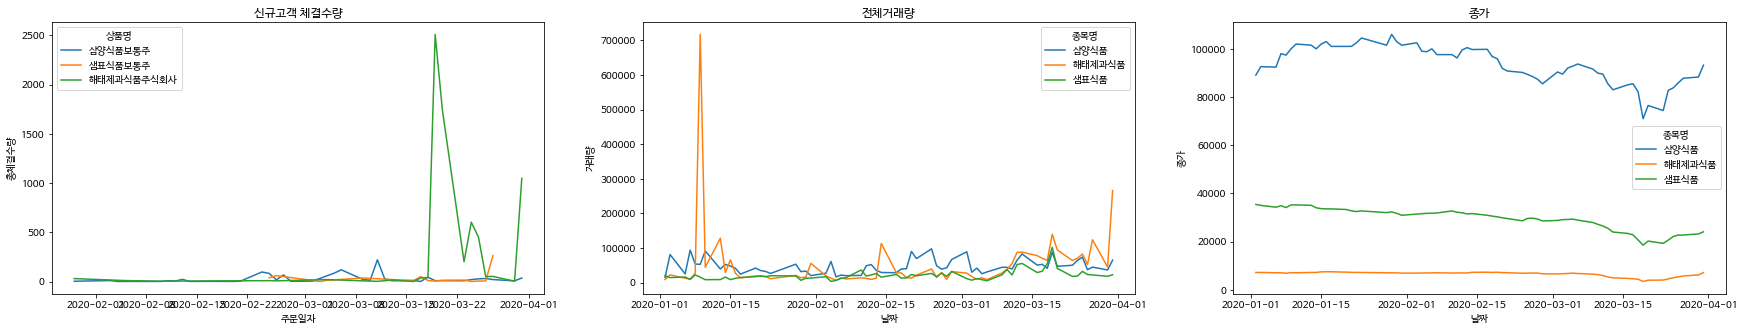

In [146]:

plt.figure(figsize=(30,5))

stock_food = file.loc[(file['상품명'].str.contains('식품'))&(~file['상품명'].str.contains('서울식품')),['상품명','주문일자','총체결수량']].sort_values(by=['상품명','주문일자'])
stock_food_df = pd.DataFrame(stock_food.groupby(['상품명','주문일자'])['총체결수량'].sum()).reset_index()

plt.subplot(1,3,1)
sns.lineplot(data= stock_food_df, x= '주문일자',y='총체결수량', hue= '상품명')
plt.title('신규고객 체결수량')

plt.subplot(1,3,2)
ax = sns.lineplot(data= ohlcv.loc[(ohlcv['종목명'].str.contains('식품'))&(~ohlcv['종목명'].str.contains('서울식품'))], x= '날짜',y='거래량', hue= '종목명')
ax.xaxis.set_major_locator(md.AutoDateLocator())
plt.title('전체거래량')

plt.subplot(1,3,3)
ax2 = sns.lineplot(data= ohlcv.loc[(ohlcv['종목명'].str.contains('식품'))&(~ohlcv['종목명'].str.contains('서울식품'))], x= '날짜',y='종가', hue= '종목명')
ax2.xaxis.set_major_locator(md.AutoDateLocator())
plt.title('종가')


Text(0.5, 1.0, '종가')

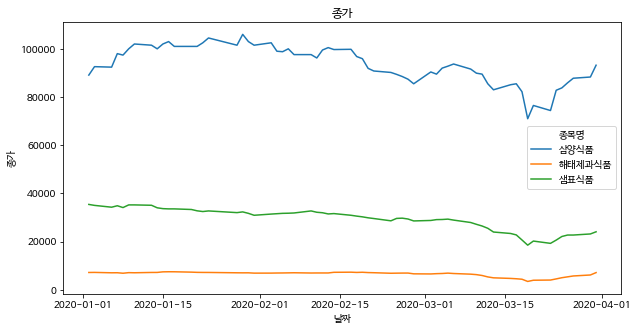

In [148]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data= ohlcv.loc[(ohlcv['종목명'].str.contains('식품'))&(~ohlcv['종목명'].str.contains('서울식품'))], x= '날짜',y='종가', hue= '종목명')
ax.xaxis.set_major_locator(md.AutoDateLocator())
plt.title('종가')
